In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

### Введение
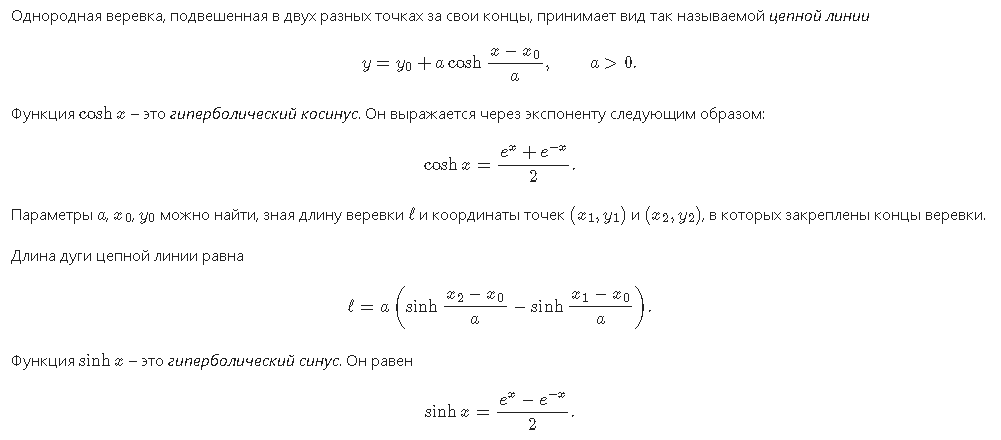

### Решить задачу устно
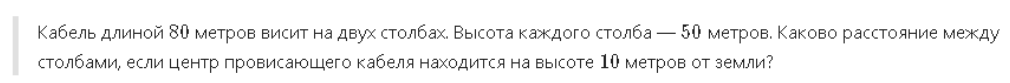
### 0. Если расстояние между центром провисающего кабеля равно 10 метров (минимально возможное расстояние при длине кабеля 80 метров, то кабель висит вертикально вниз, а столбы находятся на нулевом расстоянии.
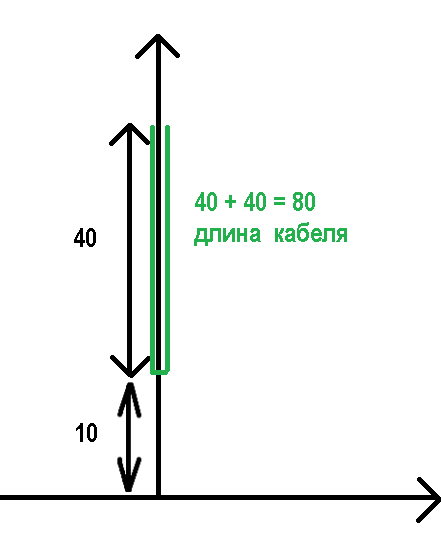

### 1. Построить графики гиперболического косинуса и гиперболического синуса.

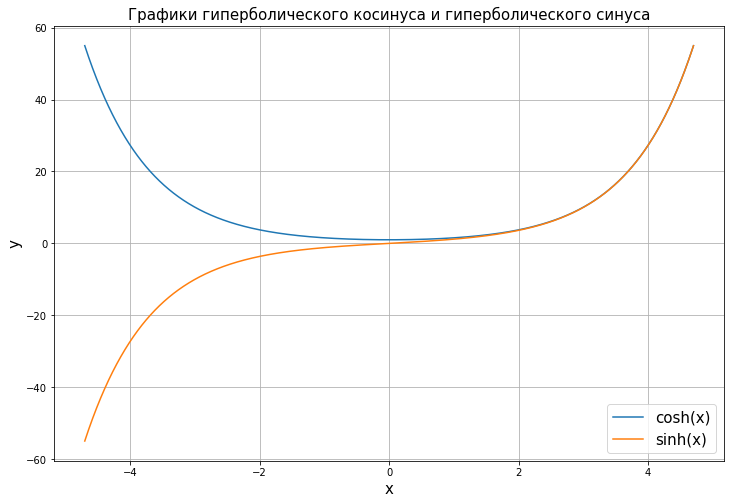

In [2]:
def cosh(x):
    return (np.exp(x) + np.exp(-x)) / 2

def sinh(x):
    return (np.exp(x) - np.exp(-x)) / 2

x = np.linspace(-4.7, 4.7, 10_000)
cosh_x = cosh(x)
sinh_x = sinh(x)

plt.figure(figsize=(12, 8))
plt.plot(x, cosh_x, label='cosh(x)')
plt.plot(x, sinh_x, label='sinh(x)')
plt.title('Графики гиперболического косинуса и гиперболического синуса', size=15)
plt.xlabel('x', size=15)
plt.ylabel('y', size=15)
plt.legend(fontsize=15)
plt.grid()
plt.show()

### 2. Составить систему уравнений (3 уравнения, 3 неизвестных), для определения параметров цепной линии по значениям длины веревки и координатам концов. 

* Система уравнений включает в себя длину дуги цепной линии и граничные условия,означающие концы, в которых подвешена однородная веревка.
* Cовместность и единственность решения этой системы зависят от значений параметров x1, x2, y1, y2 и l.
* Если точки (x1, y1) и (x2, y2) совпадают, то система уравнений будет несовместной, если l не равно нулю. В этом случае не существует цепной линии ненулевой длины, соединяющей одну и ту же точку.
* Если точки (x1, y1) и (x2, y2) различны, но расстояние между ними больше, чем заданная длина l, то система уравнений также будет несовместной. В этом случае невозможно построить цепную линию заданной длины, соединяющую эти точки.
* Если точки (x1, y1) и (x2, y2) лежат на одной вертикальной прямой (x1 = x2), то система может иметь бесконечно много решений. В этом случае цепная линия вырождается в вертикальный отрезок, и параметр a может принимать любое значение.
* Если точки (x1, y1) и (x2, y2) лежат на одной горизонтальной прямой (y1 = y2), то система может иметь два решения. В этом случае цепная линия симметрична относительно горизонтальной прямой, и решения будут отличаться знаком параметра a.
* В общем случае, когда точки (x1, y1) и (x2, y2) не лежат на одной вертикальной или горизонтальной прямой, система уравнений будет иметь единственное решение.

In [3]:
def equations(vars, x1, x2, y1, y2, l):
    a, x0, y0 = vars
    eq1 = y1 - (y0 + a * np.cosh((x1 - x0) / a))
    eq2 = y2 - (y0 + a * np.cosh((x2 - x0) / a))
    eq3 = l - (a * (np.sinh((x2 - x0) / a) - np.sinh((x1 - x0) / a)))
    return [eq1, eq2, eq3]

### 3. Так как провисающий кабель похож на гиперболу, то мы для решения будем использовать не тригонметрические функции, которые работают с прямыми и окружностями, а гиперболические, график которых похож на гиперболу.

* Замечание: newton предназначена для решения одного нелинейного уравнения, поэтому используется fsolve.

In [4]:
def find_catenary_parameters(x1, x2, y1, y2, l, a0):
    # Начальные приближения для решения
    initial_guess = [a0, (x1 + x2) / 2, (y1 + y2) / 2]

    def system_to_solve(vars):
        return equations(vars, x1, x2, y1, y2, l)

    solution = fsolve(system_to_solve, initial_guess)
    return solution

def plot_catenaries(x1, y1, x2, y2, lengths, title, a0, colors):
    x_values = np.linspace(x1, x2, 4000)
    plt.figure(figsize=(10, 6))

    for ind, l in enumerate(lengths):
        a, x0, y0 = find_catenary_parameters(x1, x2, y1, y2, l, a0)
        y_values = y0 + a * np.cosh((x_values - x0) / a)
        plt.plot(x_values, y_values, label=f'l = {l}', color=colors[ind])

    plt.scatter([x1, x2], [y1, y2])
    plt.title(title, size=15)
    plt.xlabel('x', size=15)
    plt.ylabel('y', size=15)
    plt.legend(fontsize=15)
    plt.grid(True)
    plt.show()
    return y_values

### 4. Построить соответствующие цепные линии (в одних осях координат) для концевых точек $(-1, 1), (1, 1)$ и разных значений $\ell = 2, 3, 4, 5.$

* Если длина линии равна 2 (равна расстоянию между столбами), то линия натянута (см. синюю траекторию).
* При длине цепной линии равной 3 центр веревки касается Ox (см. оранжевую траекторию).
* При длине цепной линии 4 и 5 часть веревки лежит на земле (координата Oy < 0) (см. зеленую и красную траектории).

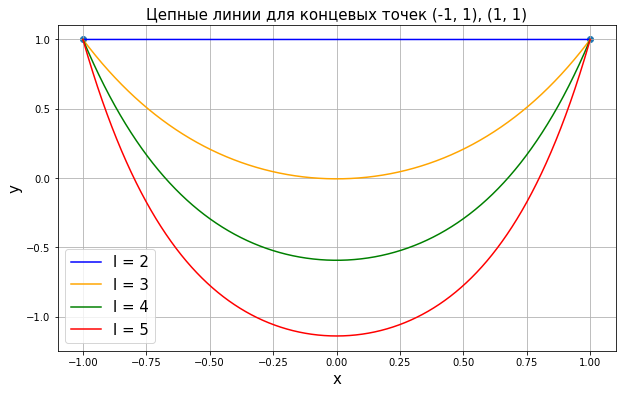

In [5]:
x1, y1 = -1, 1
x2, y2 = 1, 1
lengths = [2, 3, 4, 5]
colors = ['blue', 'orange', 'green', 'red']
plot_catenaries(x1, y1, x2, y2, lengths, "Цепные линии для концевых точек (-1, 1), (1, 1)", 1, colors);

### 5. Построить соответсвующие цепные линии (в одних осях координат) для концевых точек $(-1, 1), (1, 0)$  и разных значений $\ell = 3, 4, 5.$
* При уменьшении высоты одного столба, веревка просела ниже при тех же значениях $\ell$.

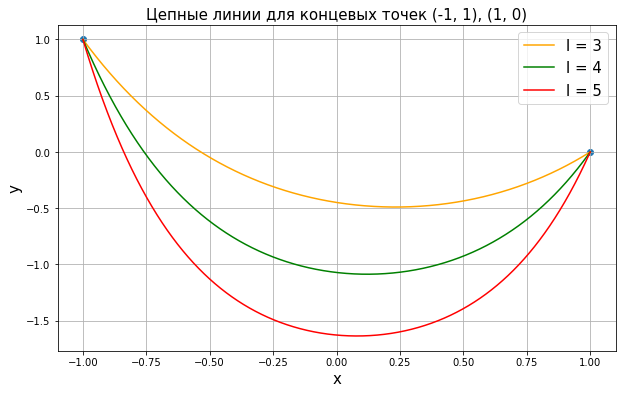

In [6]:
x1, y1 = -1, 1
x2, y2 = 1, 0
lengths = [3, 4, 5]
colors = ['orange', 'green', 'red']
plot_catenaries(x1, y1, x2, y2, lengths, "Цепные линии для концевых точек (-1, 1), (1, 0)", 0.4, colors);

### 6. Составить систему уравнений (3 уравнения, 3 неизвестных), для определения параметров такой параболы.

In [7]:
def arsinh(x):
    return np.log(x + np.sqrt(x**2 + 1))

def parabola_equations(vars, x1, x2, y1, y2, l):
    a, b, c = vars
    d1 = 2 * a * x1 + b
    d2 = 2 * a * x2 + b
    eq1 = y1 - (a * x1**2 + b * x1 + c)
    eq2 = y2 - (a * x2**2 + b * x2 + c)
    eq3 = l - (1 / (4 * a) * ((d2 * np.sqrt(1 + d2**2) + arsinh(d2)) - (d1 * np.sqrt(1 + d1**2) + arsinh(d1))))
    return [eq1, eq2, eq3]

### 7. Написать и отладить функцию, которая по значениям длины дуги и координатам концов находит все параметры параболы.

* Ситуация относительно совместности и единственности решения системы уравнений для параболы аналогична случаю с цепной линией. 
* В большинстве случаев система будет иметь единственное решение, но могут быть особые случаи, когда решений нет или их бесконечно много. 
* Если точки лежат на одной вертикальной прямой, то парабола не может пройти через них. 
* Если точки лежат на одной горизонтальной прямой, то может быть два решения.

In [8]:
def find_parabola_parameters(x1, x2, y1, y2, l, a0):
    initial_guess = [a0, 0, 0]
    solution = fsolve(lambda vars: parabola_equations(vars, x1, x2, y1, y2, l), initial_guess)
    return solution


def plot_catenaries_and_parabolas(x1, y1, x2, y2, lengths, title, a0, colors):
    x_values = np.linspace(x1, x2, 4000)
    plt.figure(figsize=(12, 12))

    for ind, l in enumerate(lengths):
        a_cat, x0, y0 = find_catenary_parameters(x1, x2, y1, y2, l, a0)
        y_cat = y0 + a_cat * np.cosh((x_values - x0) / a_cat)
        plt.plot(x_values, y_cat, label=f'Цепная линия, l = {l}', color=colors[ind])

        a_par, b, c = find_parabola_parameters(x1, x2, y1, y2, l, a0)
        y_par = a_par * x_values**2 + b * x_values + c
        plt.plot(x_values, y_par, label=f'Парабола, l = {l}', color=colors[ind], linestyle='--')

    plt.scatter([x1, x2], [y1, y2])
    plt.title(title, size=13)
    plt.xlabel('x', size=13)
    plt.ylabel('y', size=13)
    plt.legend(fontsize=13)
    plt.grid(True)
    plt.show()

### 8. В тех же осях координат, что и в п.4, построить параболы, проходящие через точки $(-1, 1), (1, 1)$ и соответствующие разным значениям $\ell = 2, 3, 4, 5$.

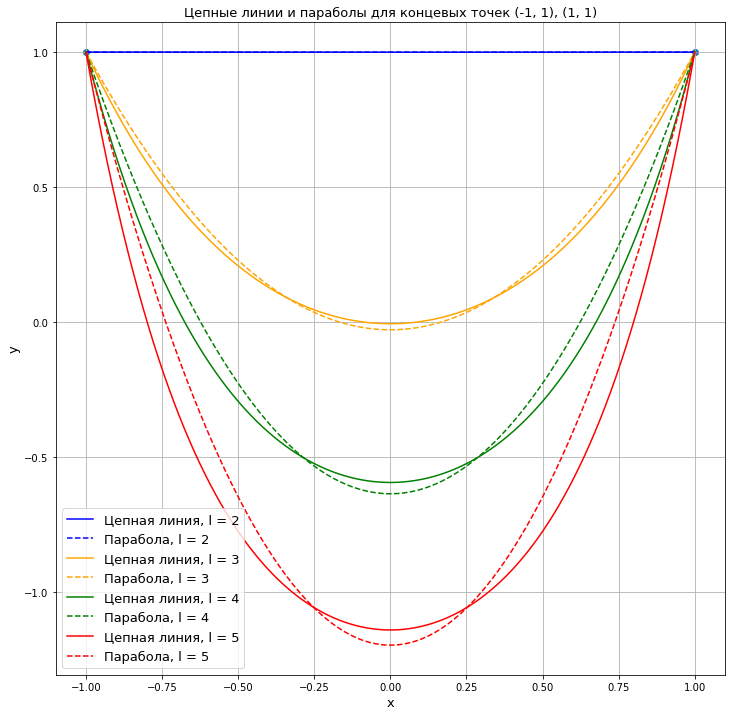

In [9]:
x1, y1 = -1, 1
x2, y2 = 1, 1
lengths = [2, 3, 4, 5]
colors = ['blue', 'orange', 'green', 'red']
plot_catenaries_and_parabolas(x1, y1, x2, y2, lengths, "Цепные линии и параболы для концевых точек (-1, 1), (1, 1)", 1, colors)

### 9. В тех же осях координат, что и в п.4, построить параболы, проходящие через точки $(-1, 1), (1, 0)$  и соответствующие разным значениям $\ell = 3, 4, 5.$

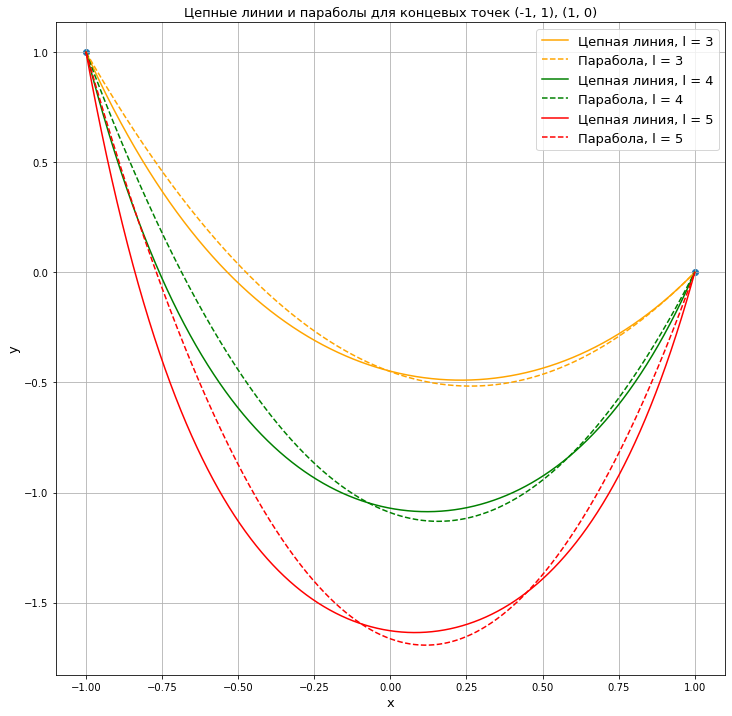

In [10]:
x1, y1 = -1, 1
x2, y2 = 1, 0
lengths = [3, 4, 5]
colors = ['orange', 'green', 'red']
plot_catenaries_and_parabolas(x1, y1, x2, y2, lengths, "Цепные линии и параболы для концевых точек (-1, 1), (1, 0)", 0.4, colors)

### 10. Выводы
* При увеличении длины веревки цепная линия становится более пологой, а при уменьшении длины - более крутой.
* Чем больше длина дуги, тем больше отличий между цепной линией и параболой.
* При уменьшении высоты одного из столбов веревка привисает ниже, чем в первом случае.
* В центре провисающего кабеля параболы проседают сильнее, в остальных случаях сильнее провисают цепные линии.
* Параболы получаются более остроугольными, чем цепные линии.